# Problem Statement:
### To find the Minimum Shortest Path between Start (User Given) & Multiple (End-Points) Hospitals

# Installing the necessary Requirements

In [2]:
import heapq
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Why Dijkstra is Suited for our Problem Statement ?


### Dijkstra's algorithm is useful when you need to find the shortest path from a single source node to all other nodes in a weighted graph.
 
#### Whereas BFS == Can be inefficient in graphs with many nodes and edges.

#### Whereas DFS == Explores as deep as possible before backtracking and hence not suitable

### Dijkstra is more efficient than BFS in such cases because it uses a priority queue to visit nodes in order of increasing distance from the source node. However, it may not work properly if there are negative edges in the graph.


## Using Dijkstra Algorithm For Finding the Shortest Path to Multiple EndPoints

In [5]:
def dijkstra_shortest_path(G, start, endpoints):
    # Initialize distances to all nodes as infinity, except start node
    distances = {node: float('inf') for node in G.nodes()}
    distances[start] = 0

    # Use a min heap to keep track of the unexplored nodes
    unexplored = [(0, start)]

    # Use a dictionary to keep track of the predecessor of each node
    predecessors = {}

    # Run Dijkstra's algorithm until the min heap is empty or we have reached all endpoints
    while unexplored and not all(node in predecessors for node in endpoints):
        # Pop the node with the smallest tentative distance from the min heap
        current_distance, current_node = heapq.heappop(unexplored)

        # Ignore this node if we have already found a shorter path to it
        if current_distance > distances[current_node]:
            continue

        # Update distances to neighboring nodes, and add them to the min heap
        for neighbor, weight in G[current_node].items():
            tentative_distance = current_distance + weight['weight']
            if tentative_distance < distances[neighbor]:
                distances[neighbor] = tentative_distance
                predecessors[neighbor] = current_node
                heapq.heappush(unexplored, (tentative_distance, neighbor))

    # Compute shortest path(s) from start node to each endpoint
    shortest_paths = []
    for endpoint in endpoints:
        path = []
        node = endpoint
        while node != start:
            path.insert(0, node)
            node = predecessors[node]
        path.insert(0, start)
        shortest_paths.append(path)

    # Compute total distance of shortest path
    shortest_distance = sum(distances[endpoint] for endpoint in endpoints)

    return shortest_paths, shortest_distance


# For the Graph we are using
### Important Landmarks: Universities, Malls, Hotels, Hospitals, Central Station .
<br />


### Source/Start will be:
###     Universities: NMIMS, IITB, SNDT, St Xavier, ISDI, Mumbai Uni, Jai Hind . 
###     Hotels: Leela, Hilton, RadBlu, Taj, ITC, Oberoi .
###     Malls: Oberoi, Inorbit, Growell, Infinity, Phoenix .
###     Central Railway Station Mumbai
<br />


### Endpoints will be 6 Hospitals: Nanavati, Hiranandani, INHS Ashvini, Jaslok, Fortis, Cloud9 .

 This is an undirected Weighted Graph with distance in kilometres
 

The shortest distance to cover all endpoints from Uni-isdi to ['Hospital-cloud9', 'Hospital-nanavati', 'Hospital-inhs', 'Hospital-jaslok', 'Hospital-fortis', 'Hospital-hiran'] is |105.2|
Shortest path 1: Uni-isdi -> Hotel-leela -> Hotel-hilton -> Hospital-nanavati -> Uni-nmims -> Mall-infinity -> Hospital-cloud9 (distance = 29.200000000000003)
Shortest path 2: Uni-isdi -> Hotel-leela -> Hotel-hilton -> Hospital-nanavati (distance = 18.6)
Shortest path 3: Uni-isdi -> Hotel-taj -> Hospital-inhs (distance = 4.0)
Shortest path 4: Uni-isdi -> Hotel-taj -> Hospital-inhs -> Hotel-oberoi -> Uni-xavier -> Uni-hind -> Hospital-jaslok (distance = 19.9)
Shortest path 5: Uni-isdi -> Hotel-taj -> Uni-mumbai -> Hospital-fortis (distance = 15.3)
Shortest path 6: Uni-isdi -> Hotel-leela -> Hospital-hiran (distance = 18.200000000000003)


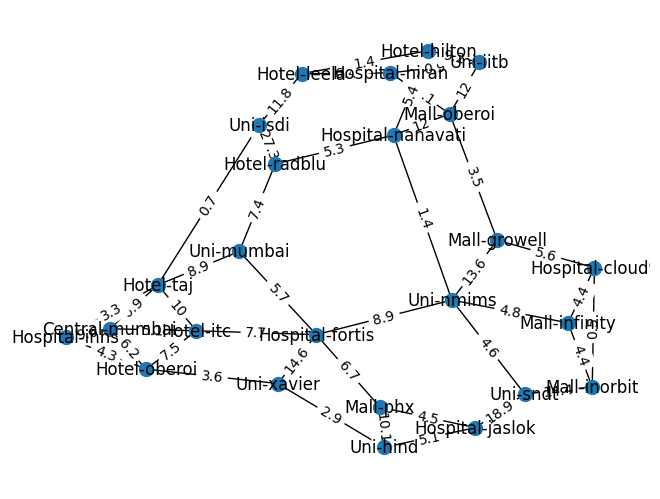

In [9]:
# Define graph
G = nx.Graph()
#Nodes from INORBIT MALL to NEIGHBOURS
G.add_edge('Mall-inorbit', 'Hospital-cloud9', weight=0.5)
G.add_edge('Mall-inorbit', 'Mall-infinity', weight=4.4)
G.add_edge('Mall-inorbit', 'Uni-sndt', weight=14.4)

#Nodes from HOSPITAL CLOUD9 to NEIGHBOURS
G.add_edge('Hospital-cloud9','Mall-inorbit', weight=0.5)
G.add_edge('Hospital-cloud9','Mall-infinity', weight=4.4)
G.add_edge('Hospital-cloud9','Mall-growell', weight=5.6)

#Nodes from GROWELL MALL to NEIGHBOURS
G.add_edge('Mall-growell', 'Mall-oberoi', weight=3.5)
G.add_edge('Mall-growell', 'Hospital-cloud9', weight=5.6)
G.add_edge('Mall-growell', 'Uni-nmims', weight=13.6)

#Nodes from OBEROI MALL to NEIGHBOURS
G.add_edge('Mall-oberoi', 'Hospital-hiran',  weight=12.1)
G.add_edge('Mall-oberoi', 'Mall-growell',  weight=3.5)
G.add_edge('Mall-oberoi', 'Hospital-nanavati',  weight=12)
G.add_edge('Mall-oberoi', 'Uni-iitb', weight=12)

#Nodes from HOSPITAL HIRAN to NEIGHBOURS
G.add_edge('Hospital-hiran', 'Uni-iitb', weight=0.9)
G.add_edge('Hospital-hiran', 'Mall-oberoi', weight=12.1)
G.add_edge('Hospital-hiran', 'Hotel-leela', weight=6.4)

#Nodes from UNI IITB to NEIGHBOURS
G.add_edge('Uni-iitb','Hotel-hilton', weight=9.2)
G.add_edge('Uni-iitb', 'Hospital-hiran',  weight=0.9)
G.add_edge('Uni-iitb','Mall-oberoi', weight=12)

#Nodes from HOTEL HILTON to NEIGHBOURS
G.add_edge('Hotel-hilton','Uni-iitb', weight=9.2)
G.add_edge('Hotel-hilton','Hotel-leela', weight=1.4)
G.add_edge('Hotel-hilton','Hospital-nanavati', weight=5.4)

#Nodes from HOTEL LEELA to NEIGHBOURS
G.add_edge('Hotel-leela', 'Hotel-hilton', weight=1.4)
G.add_edge('Hotel-leela', 'Hospital-hiran', weight=6.4)
G.add_edge('Hotel-leela', 'Uni-isdi', weight=11.8)

#Nodes from UNI ISDI to NEIGHBOURS
G.add_edge('Uni-isdi', 'Hotel-leela', weight=11.8)
G.add_edge('Uni-isdi', 'Hotel-radblu', weight=27.3)
G.add_edge('Uni-isdi', 'Hotel-taj', weight=0.7)

#Nodes from HOSPITAL NANAVATI to NEIGHBOURS
G.add_edge('Hospital-nanavati','Hotel-hilton', weight=5.4)
G.add_edge('Hospital-nanavati','Mall-oberoi', weight=12)
G.add_edge('Hospital-nanavati','Hotel-radblu', weight=5.3)
G.add_edge('Hospital-nanavati','Uni-nmims', weight=1.4)

#Nodes from HOTEL RADBLU to NEIGHBOURS
G.add_edge('Hotel-radblu', 'Uni-isdi',  weight=27.3)
G.add_edge('Hotel-radblu','Hospital-nanavati', weight=5.3)
G.add_edge('Hotel-radblu', 'Uni-mumbai',  weight=7.4)

#Nodes from INFINITY MALL to NEIGHBOURS
G.add_edge('Mall-infinity', 'Hospital-cloud9',weight=4.4)
G.add_edge('Mall-infinity','Mall-inorbit', weight=4.4)
G.add_edge('Mall-infinity','Uni-nmims', weight=4.8)


#Nodes from UNI SNDT to NEIGHBOURS
G.add_edge('Uni-sndt', 'Mall-inorbit',  weight=14.4)
G.add_edge('Uni-sndt', 'Uni-nmims',  weight=4.6)
G.add_edge('Uni-sndt', 'Hospital-jaslok',  weight=18.9)

#Nodes from UNI NMIMS to NEIGHBOURS
G.add_edge('Uni-nmims','Hospital-nanavati', weight=1.4)
G.add_edge('Uni-nmims','Mall-infinity', weight=4.8)
G.add_edge('Uni-nmims','Uni-sndt',  weight=4.6)
G.add_edge('Uni-nmims','Mall-growell',  weight=13.6)
G.add_edge('Uni-nmims','Hospital-fortis', weight=8.9)

#Nodes from HOSPITAL FORTIS to NEIGHBOURS
G.add_edge('Hospital-fortis', 'Uni-nmims', weight=8.9)
G.add_edge('Hospital-fortis', 'Uni-mumbai', weight=5.7)
G.add_edge('Hospital-fortis', 'Uni-xavier', weight=14.6)
G.add_edge('Hospital-fortis', 'Mall-phx', weight=6.7)
G.add_edge('Hospital-fortis', 'Hotel-itc', weight=7.7)

#Nodes from HOSPITAL JASLOK to NEIGHBOURS
G.add_edge('Hospital-jaslok','Uni-sndt', weight=18.9)
G.add_edge('Hospital-jaslok','Mall-phx', weight=4.5)
G.add_edge('Hospital-jaslok','Uni-hind', weight=5.1)

#Nodes from PHOENIX MALL to NEIGHBOURS
G.add_edge('Mall-phx','Hospital-fortis',  weight=6.7)
G.add_edge('Mall-phx','Hospital-jaslok', weight=4.5)
G.add_edge('Mall-phx','Uni-hind', weight=10.1)

#Nodes from UNI JAI HIND to NEIGHBOURS
G.add_edge('Uni-hind','Hospital-jaslok', weight=5.1)
G.add_edge('Uni-hind','Mall-phx', weight=10.1)
G.add_edge('Uni-hind','Uni-xavier', weight=2.9)

#Nodes from UNI ST. XAVIER to NEIGHBOURS
G.add_edge('Uni-xavier','Uni-hind', weight=2.9)
G.add_edge('Uni-xavier','Hospital-fortis', weight=14.6)
G.add_edge('Uni-xavier','Hotel-oberoi', weight=3.6)

#Nodes from UNI MUMBAI to NEIGHBOURS
G.add_edge('Uni-mumbai', 'Hospital-fortis',  weight=5.7)
G.add_edge('Uni-mumbai','Hotel-radblu',  weight=7.4)
G.add_edge('Uni-mumbai','Hotel-taj',  weight=8.9)

#Nodes from HOTEL ITC to NEIGHBOURS
G.add_edge('Hotel-itc','Hotel-oberoi', weight=7.5)
G.add_edge('Hotel-itc','Hotel-taj', weight=10)
G.add_edge('Hotel-itc', 'Hospital-fortis',  weight=7.7)
G.add_edge('Hotel-itc', 'Central-mumbai',  weight=5.1)

#Nodes from HOTEL OBEROI to NEIGHBOURS
G.add_edge('Hotel-oberoi','Uni-xavier', weight=3.6)
G.add_edge('Hotel-oberoi','Hotel-itc', weight=7.5)
G.add_edge('Hotel-oberoi','Central-mumbai', weight=6.2)
G.add_edge('Hotel-oberoi','Hospital-inhs', weight=4.3)


#Nodes from HOTEL TAJ to NEIGHBOURS
G.add_edge('Hotel-taj','Central-mumbai', weight=6.9)
G.add_edge('Hotel-taj','Hospital-inhs', weight=3.3)
G.add_edge('Hotel-taj','Hotel-itc', weight=10)
G.add_edge('Hotel-taj','Uni-mumbai',  weight=8.9)
G.add_edge('Hotel-taj','Uni-isdi',  weight=0.7)


#Nodes from CENTRAL MUMBAI RAILWAY STATION to NEIGHBOURS
G.add_edge('Central-mumbai','Hotel-itc',   weight=5.1)
G.add_edge('Central-mumbai','Hotel-oberoi', weight=6.2)
G.add_edge('Central-mumbai','Hotel-taj', weight=6.9)
G.add_edge('Central-mumbai','Hospital-inhs', weight=9.6)


#Nodes from HOSPITAL INHS to NEIGHBOURS
G.add_edge('Hospital-inhs','Hotel-oberoi',weight=4.3)
G.add_edge('Hospital-inhs','Central-mumbai', weight=9.6)
G.add_edge('Hospital-inhs','Hotel-taj', weight=3.3)



# Define start node and endpoints
start = 'Uni-isdi'
endpoints = ['Hospital-cloud9', 'Hospital-nanavati', 'Hospital-inhs', 'Hospital-jaslok', 'Hospital-fortis', 'Hospital-hiran' ]

# Compute shortest path(s) and distance using Dijkstra's algorithm
shortest_paths, shortest_distance = dijkstra_shortest_path(G, start, endpoints)

# Print shortest path(s) and distance
print(f"The shortest distance to cover all endpoints from {start} to {endpoints} is |{shortest_distance}|")
for i, path in enumerate(shortest_paths):
    print(f"Shortest path {i+1}: {' -> '.join(path)} (distance = {sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))})")

# Create a list of edge colors based on whether each edge is in the shortest path
edge_colors = ['red' if (u, v) in shortest_paths[0] or (v, u) in shortest_paths[0] else 'black' for u, v in G.edges()]


# Draw graph with colored edges
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_size=100)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v): d['weight'] for u,v,d in G.edges(data=True)})
plt.show()


# THE END

## Thank You

# Brshank Singh Negi | I032